In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
graduation_data = pd.read_csv("graduation_rate.csv")
graduation_data.head()

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,22,1625,high school,40999,3.0,3.1,7
1,29,2090,associate's degree,75817,4.0,3.4,5
2,30,2188,bachelor's degree,82888,4.0,3.9,3
3,33,2151,associate's degree,93518,4.0,3.7,5
4,29,2050,associate's degree,79153,4.0,3.4,6


In [4]:
graduation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ACT composite score          1000 non-null   int64  
 1   SAT total score              1000 non-null   int64  
 2   parental level of education  1000 non-null   object 
 3   parental income              1000 non-null   int64  
 4   high school gpa              1000 non-null   float64
 5   college gpa                  1000 non-null   float64
 6   years to graduate            1000 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 54.8+ KB


In [5]:
graduation_data.isnull().sum()

ACT composite score            0
SAT total score                0
parental level of education    0
parental income                0
high school gpa                0
college gpa                    0
years to graduate              0
dtype: int64

In [8]:
for i in range(len(graduation_data.columns)):
  print(graduation_data.columns[i]," = ",graduation_data[graduation_data.columns[i]].max())

ACT composite score  =  36
SAT total score  =  2385
parental level of education  =  some high school
parental income  =  124470
high school gpa  =  4.0
college gpa  =  4.0
years to graduate  =  10


In [9]:
graduation_data.head()

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,22,1625,high school,40999,3.0,3.1,7
1,29,2090,associate's degree,75817,4.0,3.4,5
2,30,2188,bachelor's degree,82888,4.0,3.9,3
3,33,2151,associate's degree,93518,4.0,3.7,5
4,29,2050,associate's degree,79153,4.0,3.4,6


<Axes: >

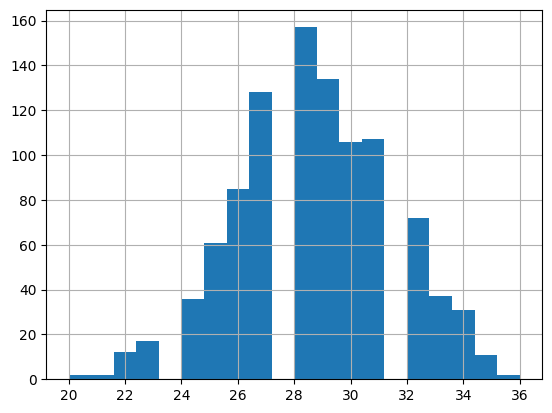

In [10]:
graduation_data["ACT composite score"].hist(bins=20)

<ipython-input-15-d6ae1bc2a5a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(graduation_data["ACT composite score"])


<Axes: xlabel='ACT composite score', ylabel='Density'>

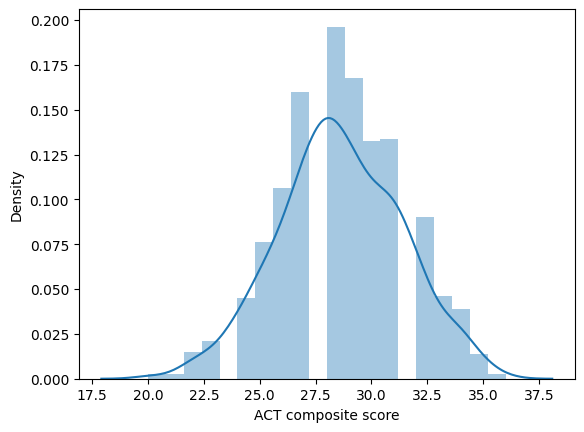

In [15]:
sns.distplot(graduation_data["ACT composite score"])

<Axes: xlabel='years to graduate', ylabel='count'>

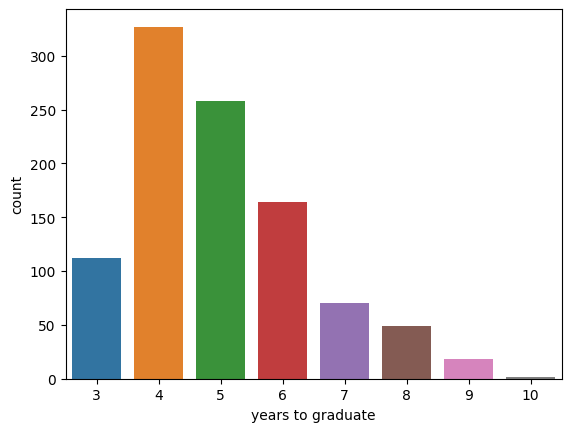

In [16]:
sns.countplot(x="years to graduate",data=graduation_data)

<Axes: xlabel='high school gpa', ylabel='count'>

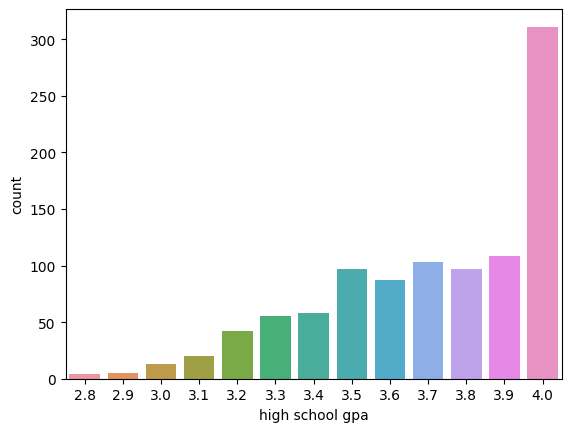

In [18]:
sns.countplot(x="high school gpa",data=graduation_data)

<Axes: xlabel='college gpa', ylabel='count'>

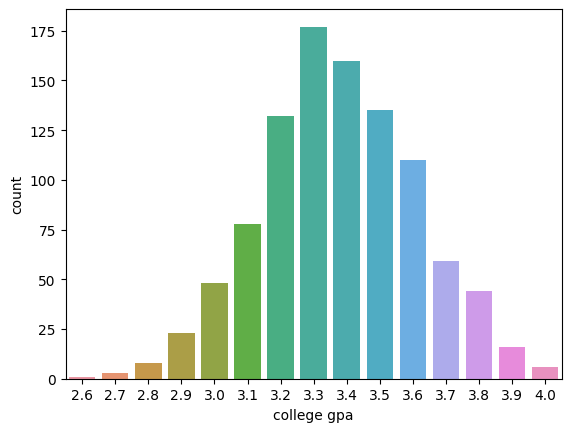

In [19]:
sns.countplot(x="college gpa",data=graduation_data)

<ipython-input-22-5ddeae3ae565>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(graduation_data["parental income"])


<Axes: xlabel='parental income', ylabel='Density'>

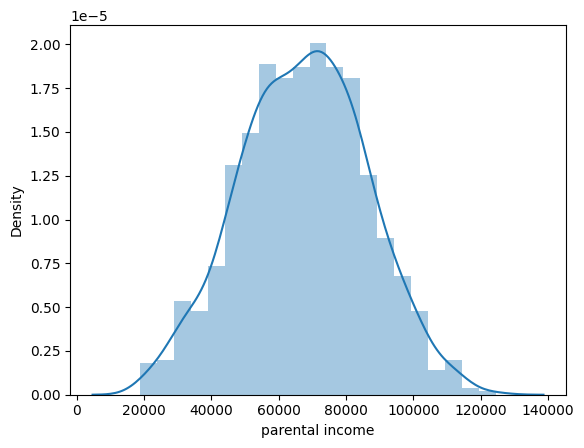

In [22]:
sns.distplot(graduation_data["parental income"])

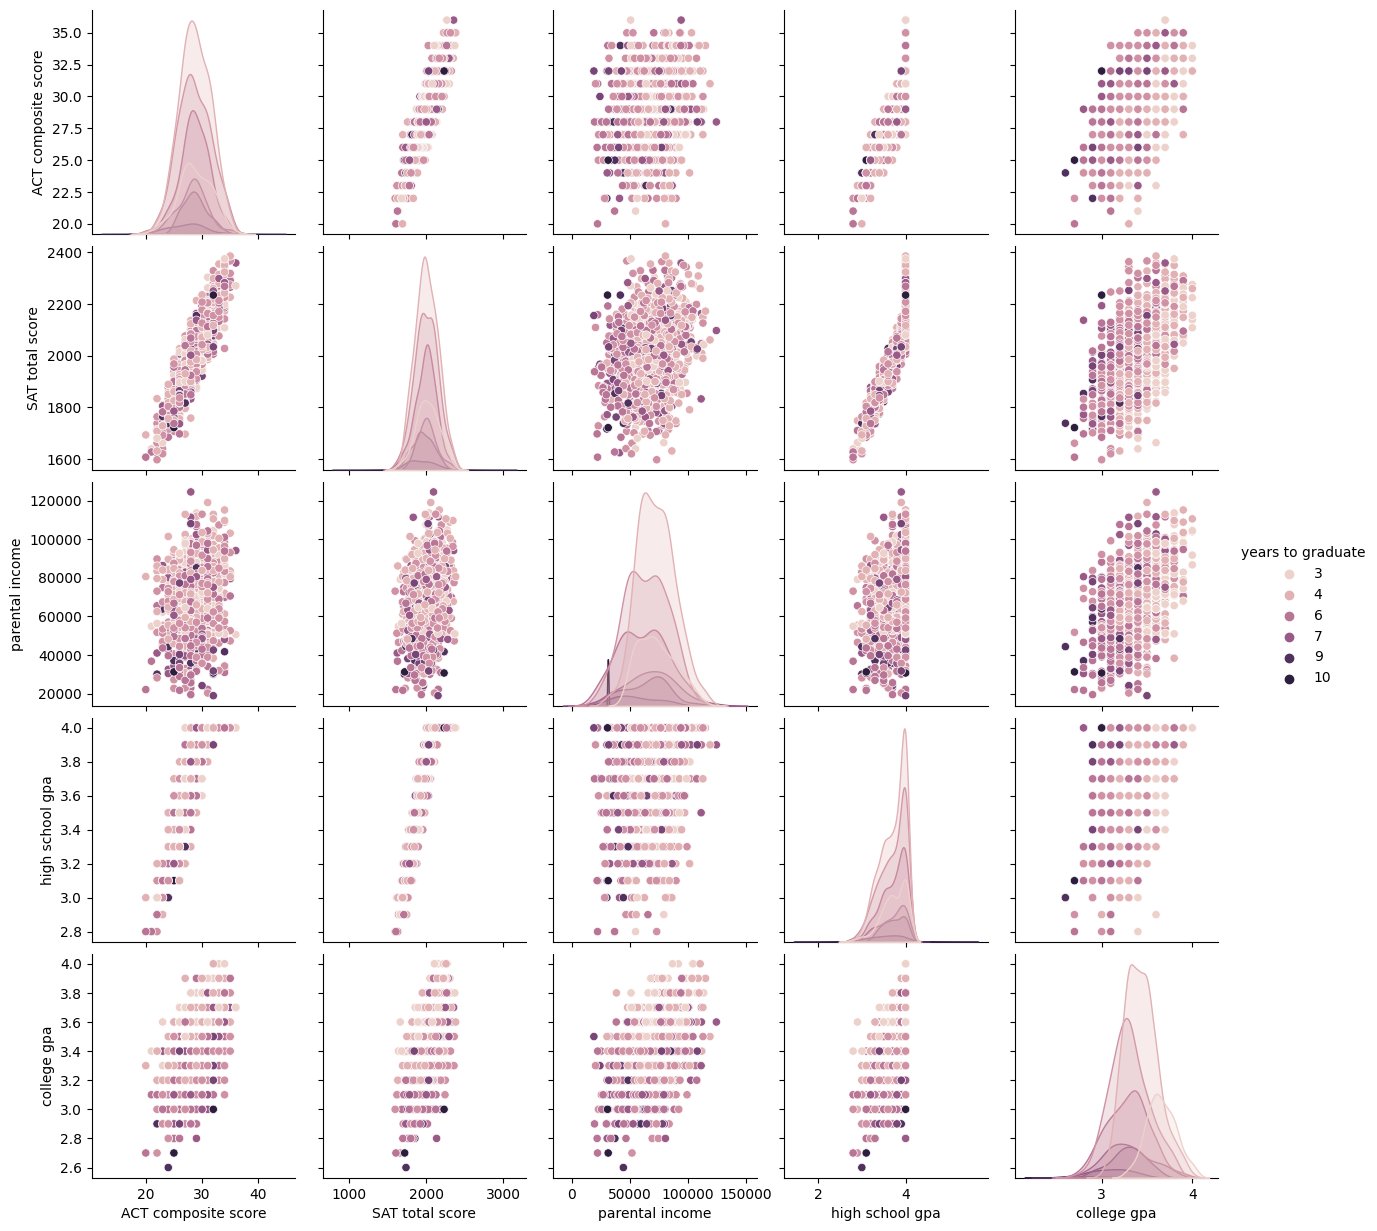

In [26]:
sns.pairplot(graduation_data,hue="years to graduate")

<ipython-input-27-6da6827f60c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(graduation_data.corr(),annot=True)


<Axes: >

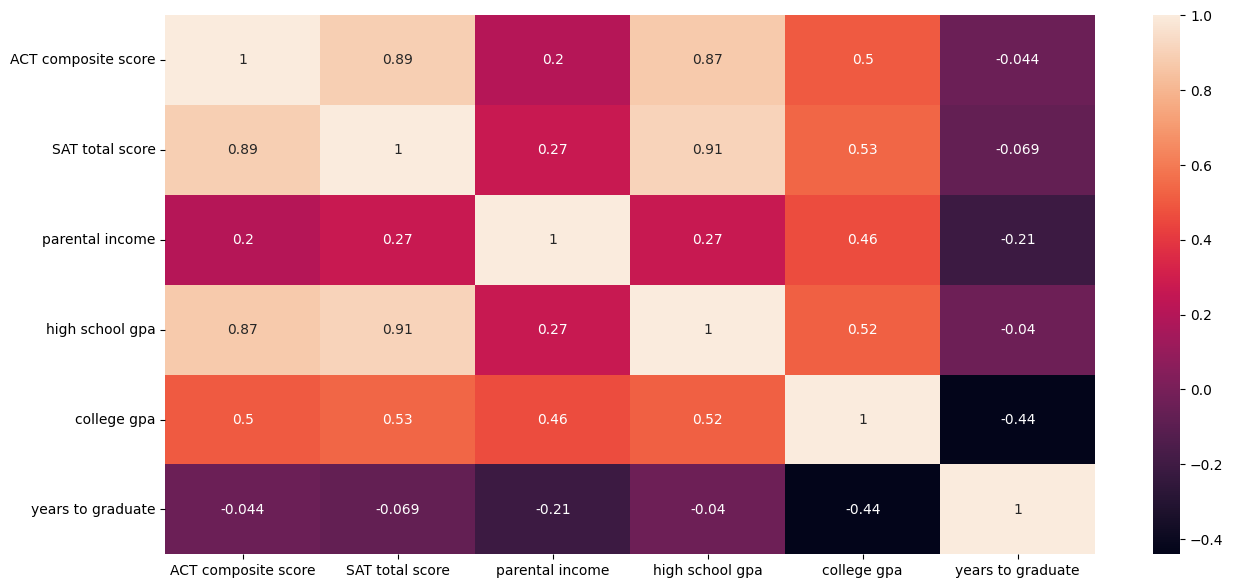

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(graduation_data.corr(),annot=True)

In [28]:
graduation_data.columns

Index(['ACT composite score', 'SAT total score', 'parental level of education',
       'parental income', 'high school gpa', 'college gpa',
       'years to graduate'],
      dtype='object')

In [29]:
graduation_data["parental level of education"].value_counts()

some college          232
high school           207
some high school      180
associate's degree    176
bachelor's degree     124
master's degree        81
Name: parental level of education, dtype: int64

In [33]:
some_college = pd.get_dummies(graduation_data["parental level of education"])
graduation_data = pd.concat([graduation_data.drop("parental level of education",axis=1),some_college],axis=1)
graduation_data.head()

,ACT composite score,SAT total score,parental income,high school gpa,college gpa,years to graduate,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,22,1625,40999,3.0,3.1,7,0,0,1,0,0,0
1,29,2090,75817,4.0,3.4,5,1,0,0,0,0,0
2,30,2188,82888,4.0,3.9,3,0,1,0,0,0,0
3,33,2151,93518,4.0,3.7,5,1,0,0,0,0,0
4,29,2050,79153,4.0,3.4,6,1,0,0,0,0,0


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(graduation_data[graduation_data.columns[0:5]])
scaled = scaler.transform(graduation_data[graduation_data.columns[0:5]])

In [50]:
s = pd.DataFrame(scaled,columns=graduation_data.columns[0:5])
scaled_graduation_data = pd.concat([s,graduation_data[graduation_data.columns[5:]]],axis=1)
scaled_graduation_data.head()

,ACT composite score,SAT total score,parental income,high school gpa,college gpa,years to graduate,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,-2.382770,-2.585455,-1.401795,-2.462772,-1.166368,7,0,0,1,0,0,0
1,0.141733,0.621313,0.448463,1.018670,0.099131,5,1,0,0,0,0,0
2,0.502376,1.297148,0.824222,1.018670,2.208296,3,0,1,0,0,0,0
3,1.584306,1.041986,1.389110,1.018670,1.364630,5,1,0,0,0,0,0
4,0.141733,0.345462,0.625741,1.018670,0.099131,6,1,0,0,0,0,0


In [51]:
from sklearn.model_selection import train_test_split
X = scaled_graduation_data.drop("years to graduate",axis=1)
y = scaled_graduation_data["years to graduate"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 11), (200, 11), (800,), (200,))

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
lr.coef_ , lr.intercept_

(array([ 0.08841171,  0.05316474,  0.05071069,  0.27341382, -0.8446598 ,
         0.15533075, -0.22282627,  0.18523831, -0.12650381, -0.05675952,
         0.06552053]),
 4.9491932118323)

In [57]:
preds = lr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

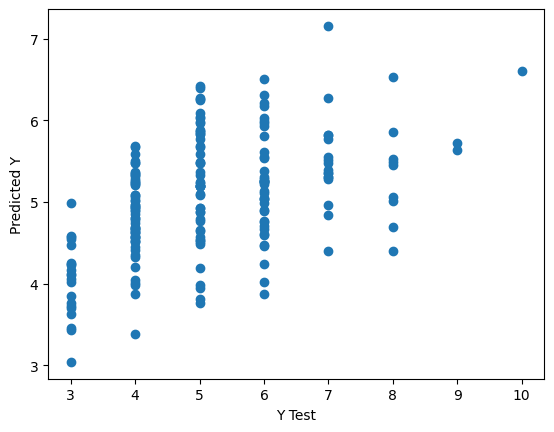

In [58]:
plt.scatter(y_test,preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [59]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 0.9923966400346049
MSE: 1.4723195541772716
RMSE: 1.2133917562672294


# Lets also make neural network model

In [60]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="relu")
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

history_1 = model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 4.5343 - mae: 4.5343
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 4.4002 - mae: 4.4002
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 4.2371 - mae: 4.2371
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 4.0505 - mae: 4.0505
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 3.8459 - mae: 3.8459
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 3.6347 - mae: 3.6347
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 3.4308 - mae: 3.4308
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 3.2324 - mae: 3.2324
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 3.0324 - mae: 3.0324
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 2.8310 - mae: 2.8310
Epoch 11/100
25/25 [==============================] - 0s 4m

In [75]:
tf.constant(y_test).ndim

1

In [76]:
tf.squeeze(preds_1).ndim

1